	> log info
	> log unreg 0
['log unreg 0', 'SUCCESS']
	> log unreg 1
['log unreg 1', 'SUCCESS']
	> log unreg 2
['log unreg 2', 'SUCCESS']
	> log unreg 3
['log unreg 3', 'SUCCESS']
	> log reg 0 LOG_theta_Encoder 537543432 10000 double
['log reg 0 LOG_theta_Encoder 537543432 10000 double', 'SUCCESS']
	> log reg 1 LOG_theta_e_Enc 537543440 10000 double
['log reg 1 LOG_theta_e_Enc 537543440 10000 double', 'SUCCESS']
	> log reg 2 LOG_omega_Enc 537543448 10000 double
['log reg 2 LOG_omega_Enc 537543448 10000 double', 'SUCCESS']
	> log reg 3 LOG_omega_e_Enc 537543456 10000 double
['log reg 3 LOG_omega_e_Enc 537543456 10000 double', 'SUCCESS']
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_theta_Encoder       0            double             10000.0                0       
LOG_theta_e_Enc       1            double             10000.0                0       
LOG_omega_Enc      

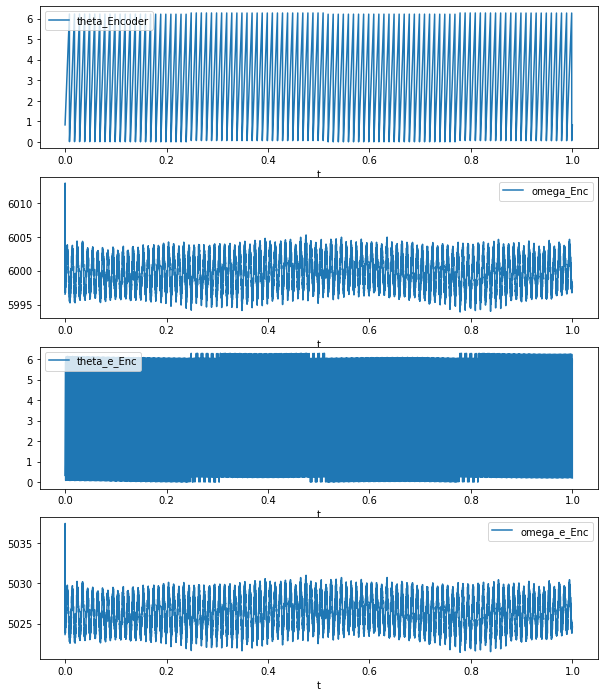

In [12]:
import time
import pathlib as pl
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
scripts_folder = r'D:\ProjectSpace\GitHub\updatedDriveCabinet\AMDC-Firmware\scripts'
sys.path.append(scripts_folder)

from AMDC import AMDC
from AMDC_Logger import AMDC_Logger, find_mapfile

## Setup Logger
amdc = AMDC()

# Set comm defaults for UART
amdc.setup_comm_defaults('eth')

# Init ethernet 
amdc.eth_init()

# Set up the default ASCII command socket
s0, s0_id = amdc.eth_new_socket('ascii_cmd')
amdc.eth_set_default_ascii_cmd_socket(s0)

mapfile_path = find_mapfile(r'D:\ProjectSpace\GitHub\updatedDriveCabinet')
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

## Register variables
user_app_c_code_path = pl.Path(r'D:\ProjectSpace\GitHub\updatedDriveCabinet\myCode\usr\encoderTest\task_encoderTest.c') # SET THIS TO PATH OF YOUR USER APPLICATION CODE
logger.unregister('LOG_theta_Encoder')
logger.unregister('LOG_theta_e_Enc')
logger.unregister('LOG_omega_Enc')
logger.unregister('LOG_omega_e_Enc')

logger.register('LOG_theta_Encoder', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_theta_e_Enc', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_omega_Enc', samples_per_sec = 10000, var_type = 'double')
logger.register('LOG_omega_e_Enc', samples_per_sec = 10000, var_type = 'double')
logger.info()
####################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.start()
# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

####################   DUMP DATA AND PLOT   ####################
file_path = r'D:\ProjectSpace\GitHub\updatedDriveCabinet\jupyterNotebooks\encoderdebug6k.csv'
exp_res = logger.dump(file = file_path)

fig, axes = plt.subplots(4, 1)

figsize = (10,12)

tstart = 0
tend = 1

plot0 = ['theta_Encoder']
plot1 = ['omega_Enc']
plot2 = ['theta_e_Enc']
plot3 = ['omega_e_Enc']

exp_res[tstart:tend].filter(items=plot0).plot(figsize=figsize, ax=axes[0])
exp_res[tstart:tend].filter(items=plot1).plot(figsize=figsize, ax=axes[1])
exp_res[tstart:tend].filter(items=plot2).plot(figsize=figsize, ax=axes[2])
exp_res[tstart:tend].filter(items=plot3).plot(figsize=figsize, ax=axes[3])